## JOINs and UNIONs
Wonder how many lines of code of SQL query will be done.

### Join
In simplified, JOIN pulls rows from both tables and match the ID parameter from both tables.

The decision to use Left, Right, Full or Inner is to preserve which result would be return after query (So, if Inner Join is being used, the result will be the intersection of those two tables)
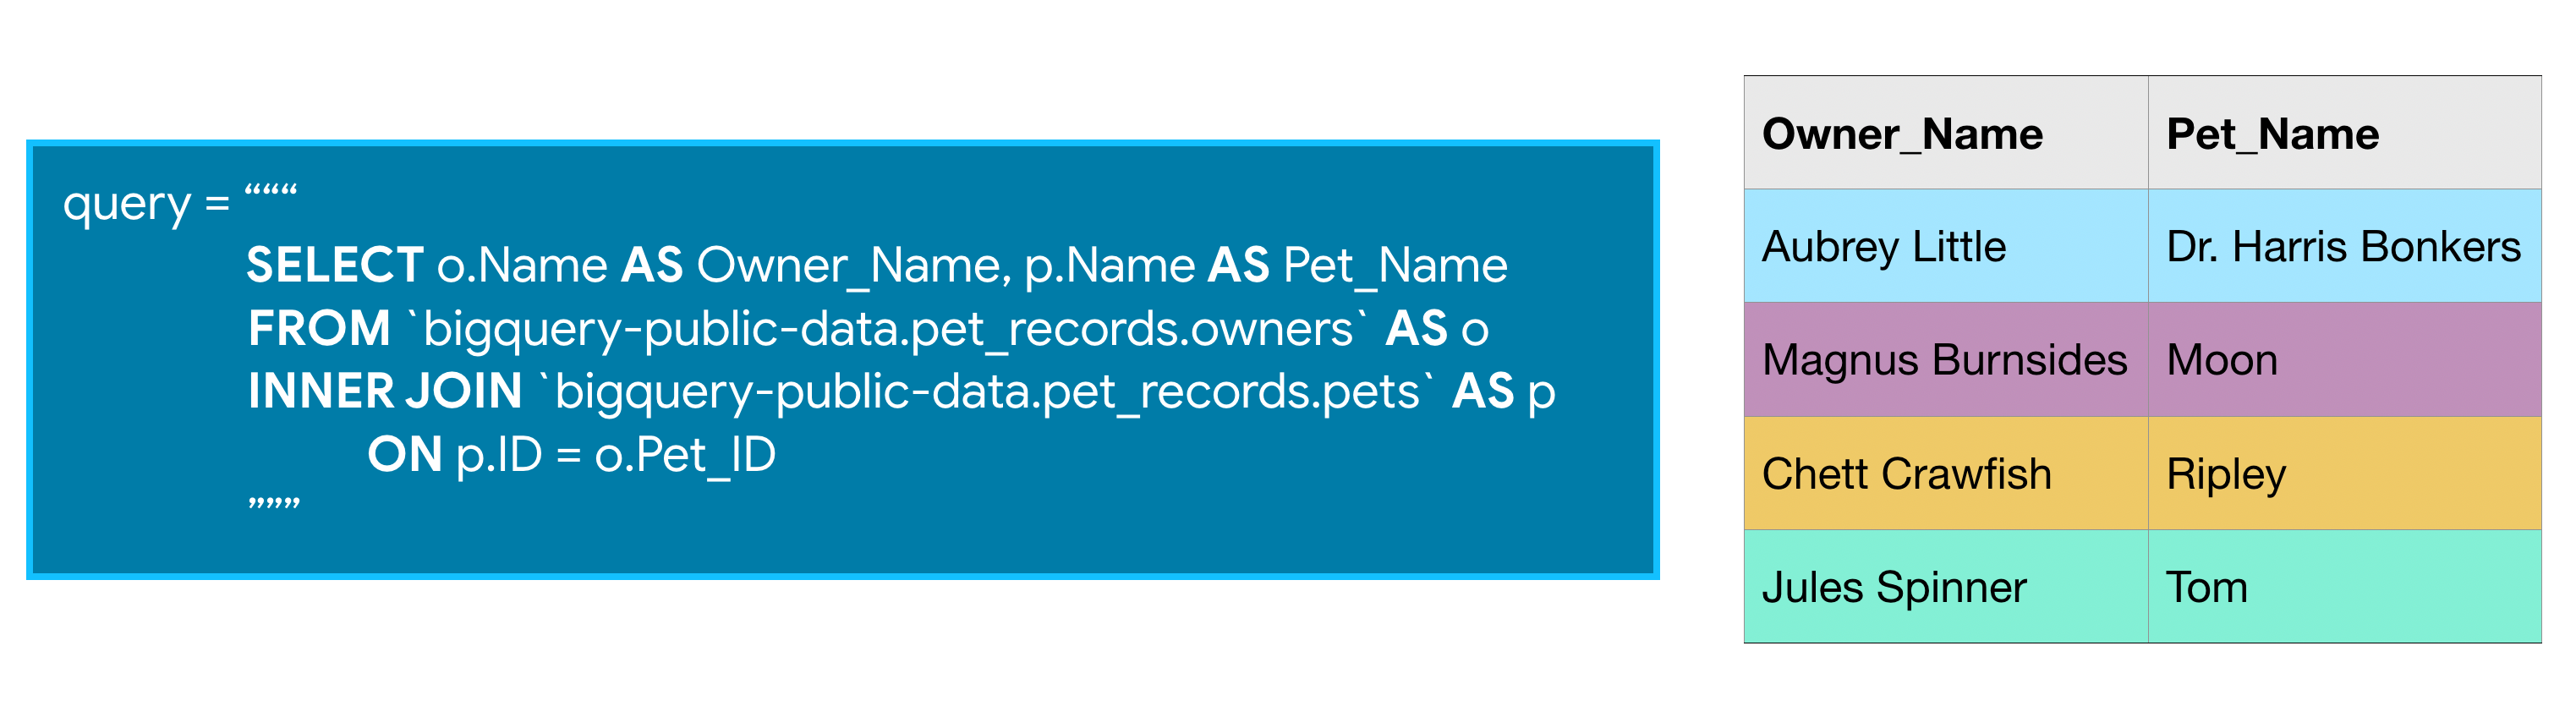

### UNIONs
As you've seen, JOINs horizontally combine results from different tables. If you instead would like to vertically concatenate columns, you can do so with a UNION. The example query below combines the Age columns from both tables.
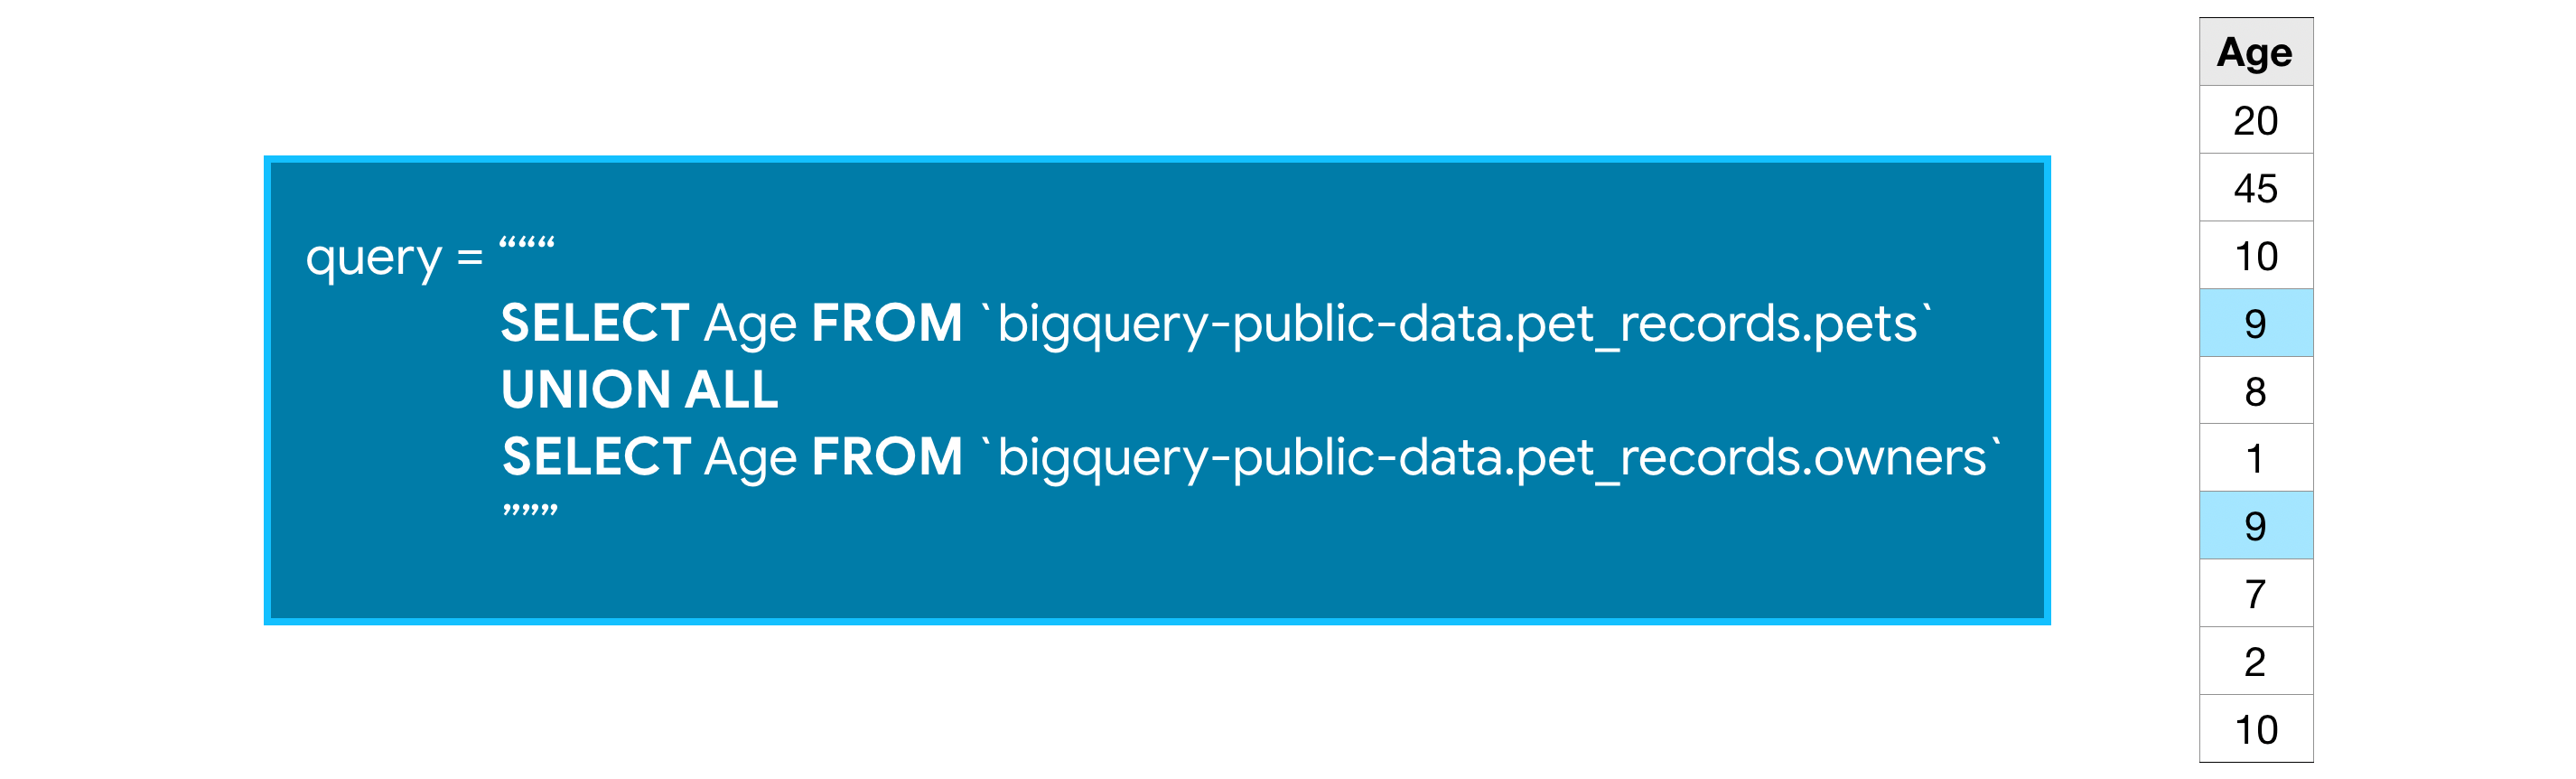

#### Notes: 
Note that with Union, the types of both columns need to be same, but columns name can be differ.


In [ ]:
# Query to select all stories posted on January 1, 2012, with number of comments
join_query = """
             WITH c AS
             (
             SELECT parent, COUNT(*) as num_comments
             FROM `bigquery-public-data.hacker_news.comments` 
             GROUP BY parent
             )
             SELECT s.id as story_id, s.by, s.title, c.num_comments
             FROM `bigquery-public-data.hacker_news.stories` AS s
             LEFT JOIN c
             ON s.id = c.parent
             WHERE EXTRACT(DATE FROM s.time_ts) = '2012-01-01'
             ORDER BY c.num_comments DESC
             """

# Run the query, and return a pandas DataFrame
join_result = client.query(join_query).result().to_dataframe()
join_result.head()
